In [1]:
pip install scikit-learn

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os
import cv2
import joblib
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import make_scorer

In [4]:
dir = '/content/drive/My Drive/Airwritten Dataset'

X = []
y = []

for label in os.listdir(dir):
  label_dir = os.path.join(dir, label)

  for image in os.listdir(label_dir):
    image_dir = os.path.join(label_dir, image)

    gray_image = cv2.imread(image_dir, 0)
    normalized = gray_image/255.0

    normalized = np.array(normalized)

    X.append(normalized.flatten())
    y.append(label)

In [5]:
y_np = np.array(y)

In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_np)

In [7]:
y_encoded

array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 13

In [8]:
models = {
    'knn': KNeighborsClassifier(),
    'rdf': RandomForestClassifier(),
    'lgr': LogisticRegression()
}

In [9]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=11)

result = []

scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro', zero_division=0),
    'recall_macro': make_scorer(recall_score, average='macro')
}

for model_name, model in models.items():
  r = cross_validate(model, X, y_encoded,
                     scoring=scoring,
                     cv=5, verbose=2,
                     # return_estimator=True
                     )
  result.append(r)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


[CV] END .................................................... total time=   1.4s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   4.1s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   2.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.8s finished


[CV] END .................................................... total time=   5.7s
[CV] END .................................................... total time=   5.6s
[CV] END .................................................... total time=   3.6s
[CV] END .................................................... total time=   4.5s
[CV] END .................................................... total time=   4.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.3s finished


In [10]:
result

[{'fit_time': array([0.01829171, 0.01990008, 0.01699185, 0.0185895 , 0.01792455]),
  'score_time': array([0.09196091, 0.07706237, 0.0738287 , 0.06880426, 0.06850243]),
  'test_accuracy': array([0.78350515, 0.86597938, 0.83937824, 0.84974093, 0.84974093]),
  'test_precision_macro': array([0.77827173, 0.91300921, 0.86757182, 0.89191919, 0.87985264]),
  'test_recall_macro': array([0.76688312, 0.85392015, 0.82337662, 0.83535354, 0.83704906])},
 {'fit_time': array([1.42676401, 1.7223084 , 4.06277752, 2.80142879, 2.57662797]),
  'score_time': array([0.01740479, 0.12601113, 0.02573013, 0.02825069, 0.02913165]),
  'test_accuracy': array([0.89175258, 0.94845361, 0.95854922, 0.94818653, 0.93264249]),
  'test_precision_macro': array([0.91043124, 0.95287398, 0.96244589, 0.96207496, 0.95091281]),
  'test_recall_macro': array([0.87723665, 0.94440837, 0.95454545, 0.94141414, 0.92222222])},
 {'fit_time': array([5.65879178, 5.56611848, 3.57697701, 4.46276665, 4.79598451]),
  'score_time': array([0.0447

In [11]:
nms = ['knn', 'rdf', 'lgr']
for index, model in enumerate(result):
  print(nms[index])
  print(f'accuracy {np.mean(model["test_accuracy"])}')
  print(f'precision {np.mean(model["test_precision_macro"])}')
  print(f'recall {np.mean(model["test_recall_macro"])}')
  print('-------------------------------')

knn
accuracy 0.8376689279418834
precision 0.8661249188521916
recall 0.8233164983164982
-------------------------------
rdf
accuracy 0.9359168847817958
precision 0.9477477741114105
recall 0.9279653679653681
-------------------------------
lgr
accuracy 0.971059238288553
precision 0.9772614422614423
recall 0.9693867243867244
-------------------------------


In [12]:
 grid = [
    # L2 regularization
    {
        'penalty': ['l2'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear', 'newton-cg'],
        'fit_intercept': [True, False],
        'max_iter': [100, 500]
    },
    # L1 regularization (only works with liblinear or saga)
    {
        'penalty': ['l1'],
        'C': [0.001, 0.01, 0.1, 1],
        'solver': ['liblinear', 'saga'],
        'fit_intercept': [True],
        'max_iter': [100, 500]
    },
    # ElasticNet (only with saga)
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1],
        'l1_ratio': [0.1, 0.5, 0.9],
        'solver': ['saga'],
        'fit_intercept': [True],
        'max_iter': [500]
    },
    # No regularization (none)
    {
        'penalty': ['none'],
        'solver': ['lbfgs', 'newton-cg', 'saga'],
        'fit_intercept': [True, False],
        'max_iter': [500]
    }
]

cv_search = RandomizedSearchCV(LogisticRegression(), grid, scoring=scoring,
                           refit='accuracy', verbose=2, cv=5, n_iter=5)

cv_search.fit(X, y_encoded)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END C=0.0001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   7.3s
[CV] END C=0.0001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   9.5s
[CV] END C=0.0001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   7.8s
[CV] END C=0.0001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   7.2s
[CV] END C=0.0001, fit_intercept=True, max_iter=100, penalty=l2, solver=lbfgs; total time=   8.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=  28.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=  18.5s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=  18.4s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, solver=lbfgs; total time=  19.1s
[CV] END C=0.01, fit_intercept=True, max_iter=500, penalty=l2, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                                         'fit_intercept': [True, False],
                                         'max_iter': [100, 500],
                                         'penalty': ['l2'],
                                         'solver': ['lbfgs', 'liblinear',
                                                    'newton-cg']},
                                        {'C': [0.001, 0.01, 0.1, 1],
                                         'fit_intercept': [True],
                                         'max_iter': [100, 500],
                                         'penalty': ['l1'],
                                         'solver': ['liblinear', 'saga']},
                                        {'C'...
                                         'solver': ['saga']},
                                        {'fit_intercept': [True, False],
                                         'max_iter': [500], 'penalty': ['none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'saga']}],
                   refit='accuracy',
                   scoring={'accuracy': 'accuracy',
                            'precision_macro': make_scorer(precision_score, response_method='predict', average=macro, zero_division=0),
                            'recall_macro': make_scorer(recall_score, response_method='predict', average=macro)},
                   verbose=2)

In [13]:
cv_search.best_estimator_, cv_search.best_params_

(LogisticRegression(C=1, fit_intercept=False, max_iter=500),
 {'solver': 'lbfgs',
  'penalty': 'l2',
  'max_iter': 500,
  'fit_intercept': False,
  'C': 1})

In [14]:
logistic_regression = LogisticRegression(C=1, fit_intercept=False,
                                         max_iter=500, penalty='l2',
                                         solver='lbfgs'
                                         )

In [15]:
logistic_regression.fit(X, y_encoded)

LogisticRegression(C=1, fit_intercept=False, max_iter=500)

In [38]:
dir = '/content/drive/My Drive/Airwritten Test 2'

X_test = []
y_test = []

for label in os.listdir(dir):
  label_dir = os.path.join(dir, label)

  for image in os.listdir(label_dir):
    image_dir = os.path.join(label_dir, image)

    gray_image = cv2.imread(image_dir, 0)
    gray_image = cv2.resize(gray_image, (83, 84))
    normalized = gray_image/255.0

    normalized = np.array(normalized)

    X_test.append(normalized.flatten())
    y_test.append(label)

y_test = np.array(y_test)
y_test = label_encoder.transform(y_test)

In [39]:
len(y_test)

498

In [40]:
len(X_test)

498

In [41]:
y_pred = logistic_regression.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  0, 16,  3,  0,  0,  0,  0,  0,  1,  0,  0,  4,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,
         0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  

<Axes: >

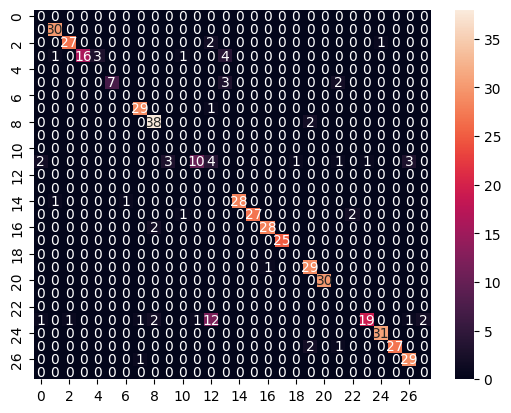

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=None)

In [46]:
label_encoder.classes_[12], label_encoder.classes_[23]
# predict, real

(np.str_('hta1'), np.str_('pa'))

In [45]:
label_encoder.classes_

array(['a', 'ba', 'bha', 'da1', 'da2', 'dha1', 'dha2', 'ga', 'gha', 'ha',
       'hpa', 'hsa', 'hta1', 'hta2', 'ka', 'kha', 'la', 'la2', 'ma',
       'na1', 'na2', 'nga', 'nya', 'pa', 'ra', 'sa1', 'ta1', 'ta2', 'tha',
       'wa', 'ya', 'za', 'zha'], dtype='<U4')

In [47]:
joblib.dump(logistic_regression, '/content/drive/My Drive/sk_model_logreg.joblib')
joblib.dump(label_encoder, '/content/drive/My Drive/sk_label_encoder.joblib')

['/content/drive/My Drive/sk_label_encoder.joblib']